# Using MNIST DATASET

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Download the dataset and set target data to integer

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X=mnist["data"]
y=mnist["target"].astype(np.uint8)


## check and explore the dataset

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

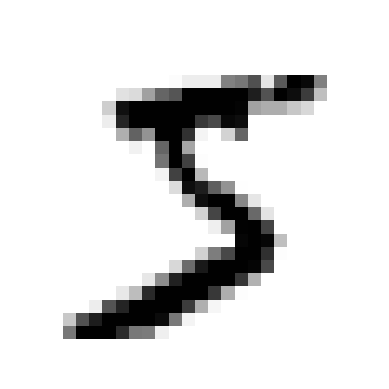

Missing values: False
Shape: (70000, 784)
Data type: float64
Label counts: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))


In [8]:
# Plot a sample image
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

# Check for missing values
print("Missing values:", np.isnan(X).any())

# Calculate basic statistics
print("Shape:", X.shape)
print("Data type:", X.dtype)
print("Label counts:", np.unique(y, return_counts=True))

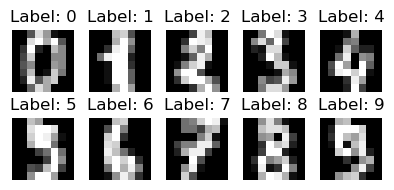

In [53]:
# Visualize a random sample of 10 images from the dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(4, 2))
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### So far there is no missing data. The MNIST dataset has 70000 observation with 784 features and data type is float.

## Prepare the data

In [13]:
# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Scaling the pixel values
#X_train_scaled = X_train / 255.0
#X_val_scaled = X_val / 255.0
#X_test_scaled = X_test / 255.0

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#create a pipeline 
my_pipe = Pipeline ([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])
X_train = my_pipe.fit_transform(X_train_pre)

### Create model 1 and evaluate it on validation set

In [23]:

# Train and evaluate a Random Forest model

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_val_scaled)
print("Random Forest accuracy on validation set:", accuracy_score(y_val, y_pred_rf))


Random Forest accuracy on validation set: 0.9663392857142857


In [56]:
# Cross-validated accuracy for Random Forest
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print("Random Forest cross-validated accuracy:", np.mean(rf_scores))


Random Forest cross-validated accuracy: 0.96484375


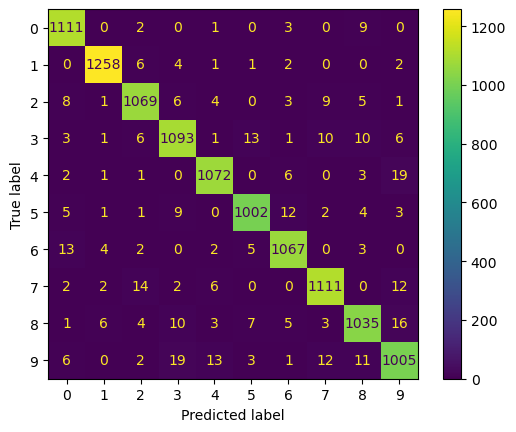

In [27]:
# display confusion Matrix

def display_confusion_matrix(y_val, y_pred_rf):
    cm = confusion_matrix(y_val, y_pred_rf)
    ConfusionMatrixDisplay(cm).plot()

display_confusion_matrix(y_val, y_pred_rf)


### Create model 2 and evaluate it on Validation set

/Users/riannaaalto/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN accuracy on validation set: 0.9433035714285715


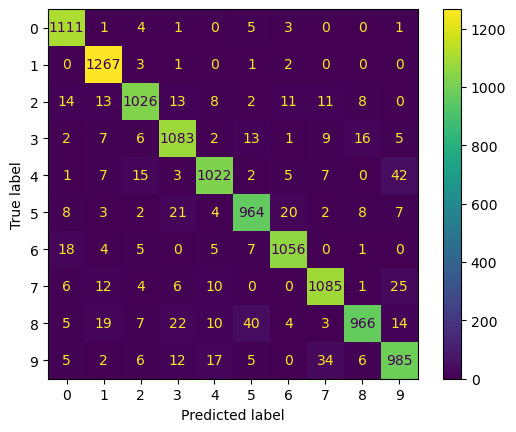

In [28]:

# Train and evaluate a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_val_scaled)
print("KNN accuracy on validation set:", accuracy_score(y_val, y_pred_knn))

# display confusion Matrix
display_confusion_matrix(y_val, y_pred_knn)


In [57]:
# Cross-validated accuracy for KNN
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("KNN cross-validated accuracy:", np.mean(knn_scores))

/Users/riannaaalto/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/riannaaalto/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

KNN cross-validated accuracy: 0.9387276785714285


### Create model 3 and evaluate it on Validation set

SVM accuracy on validation set: 0.9646428571428571


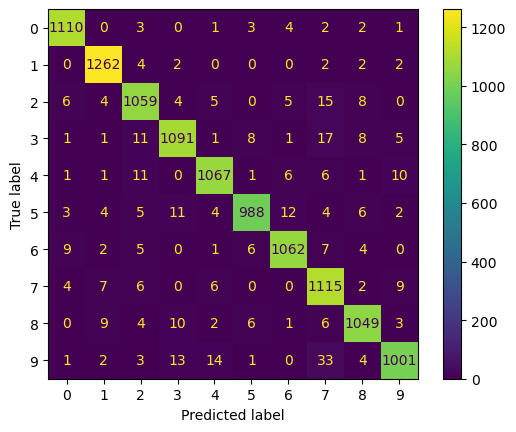

In [30]:
# Train and evaluate an SVM model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_val_scaled)
print("SVM accuracy on validation set:", accuracy_score(y_val, y_pred_svm))

# display confusion Matrix
display_confusion_matrix(y_val, y_pred_svm)


In [58]:
# Cross-validated accuracy for SVM
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5)
print("SVM cross-validated accuracy:", np.mean(svm_scores))

SVM cross-validated accuracy: 0.9601785714285714


## Fine-tune the chosen model by adjusting the hyperparameter using

In [48]:
# Define the Random Forest classifier and the hyperparameters to tune
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200, 500], 'max_depth': [10, 20, 30]}

# Define the GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 500]})

In [49]:
#Get the best estimator from the grid search
best_rf = grid_search.best_estimator_
print(f"Best estimator:{best_rf}")

Best estimator:RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)


In [50]:
# Evaluate the performance of the best estimator on the validation set

y_val_pred = best_rf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on the validation set: {accuracy}")

Accuracy on the validation set: 0.9685714285714285


In [51]:
# Evaluate the performance of the best estimator on the testing set
y_test_pred = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.9666428571428571


In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
rmse

0.7904790590883118

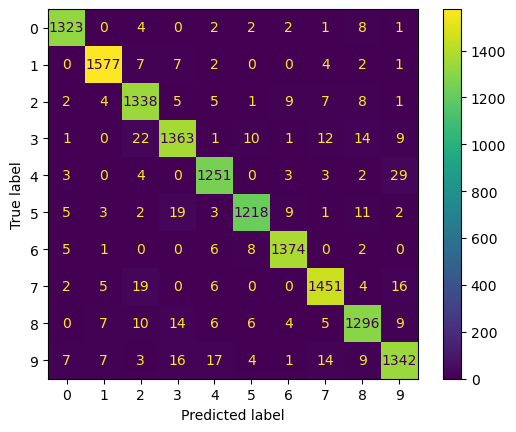

In [52]:
display_confusion_matrix(y_test, y_test_pred)